In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from pathlib import Path
import os
import pandas as pd
import librosa
from librosa import display as dsp
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


In [ ]:
INPUT_DIR = '/kaggle/input/GuitarNotes/GuitarNotes/'
OUTPUT_DIR = '/kaggle/working/'

# Print names of 10 WAV files from the input path
parent_list = os.listdir(INPUT_DIR)
for i in range(10):
    print(parent_list[i])
soundFilesList=os.listdir('../input/GuitarNotes/GuitarNotes/')

G0.wav
Elo3.wav
Elo4.wav
A7.wav
B7.wav
G7.wav
A8.wav
(Scale7) Ti.wav
B4.wav
Ehi1.wav


In [ ]:
def manipulate(data, speed_factor):
    return librosa.effects.time_stretch(data, speed_factor)

In [ ]:
def manipulate(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

soundLabel=[]
soundData=[]
rawData=[]
baseDir=INPUT_DIR
mfccSingularList=list()
for file in soundFilesList:
    filename = str.split(file,'.')[0]
    tempAudioData=list()
    audioData,sampleRate=librosa.core.load(baseDir+file,res_type='kaiser_fast')
    rawData.append(audioData)
    spectralData=librosa.feature.spectral_bandwidth(y=audioData,sr=sampleRate)
    for sd in spectralData:
        tempAudioData.append(sd)
    soundData.append(tempAudioData)
    soundLabel.append(filename)

    tempAudioData1=list()
    augmentedData1 = manipulate(audioData, 0.0001)
    rawData.append(augmentedData1)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData1,sr=sampleRate)
    for sd in spectralData:
        tempAudioData1.append(sd)
    soundData.append(tempAudioData1)
    soundLabel.append(filename)

    tempAudioData2=list()
    augmentedData2 = manipulate(audioData, 0.00001)
    rawData.append(augmentedData2)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData2,sr=sampleRate)
    for sd in spectralData:
        tempAudioData2.append(sd)
    soundData.append(tempAudioData2)
    soundLabel.append(filename)

    tempAudioData3=list()
    augmentedData3 = manipulate(audioData, 0.00002)
    rawData.append(augmentedData3)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData3,sr=sampleRate)
    for sd in spectralData:
        tempAudioData3.append(sd)
    soundData.append(tempAudioData3)
    soundLabel.append(filename)

    tempAudioData4=list()
    augmentedData4 = manipulate(audioData, 0.000004)
    rawData.append(augmentedData4)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData4,sr=sampleRate)
    for sd in spectralData:
        tempAudioData4.append(sd)
    soundData.append(tempAudioData4)
    soundLabel.append(filename)    
    
    tempAudioData5=list()
    augmentedData5 = manipulate(audioData, 0.000013)
    rawData.append(augmentedData5)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData5,sr=sampleRate)
    for sd in spectralData:
        tempAudioData5.append(sd)
    soundData.append(tempAudioData5)
    soundLabel.append(filename)

    tempAudioData6=list()
    augmentedData6 = manipulate(audioData, 0.000053)
    rawData.append(augmentedData6)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData6,sr=sampleRate)
    for sd in spectralData:
        tempAudioData6.append(sd)
    soundData.append(tempAudioData6)
    soundLabel.append(filename)

    tempAudioData7=list()
    augmentedData7 = manipulate(audioData, 0.0003)
    rawData.append(augmentedData7)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData7,sr=sampleRate)
    for sd in spectralData:
        tempAudioData7.append(sd)
    soundData.append(tempAudioData7)
    soundLabel.append(filename)

    tempAudioData8=list()
    augmentedData8 = manipulate(audioData, 0.00009)
    rawData.append(augmentedData8)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData8,sr=sampleRate)
    for sd in spectralData:
        tempAudioData8.append(sd)
    soundData.append(tempAudioData8)
    soundLabel.append(filename)


print('Done')

Done


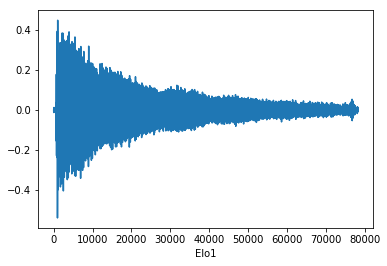

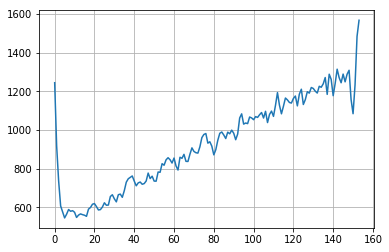

In [ ]:
idx=61
plt.plot(rawData[idx])
plt.xlabel(soundLabel[idx])
plt.show()
plt.plot(soundData[idx][0])
plt.grid()
plt.show()

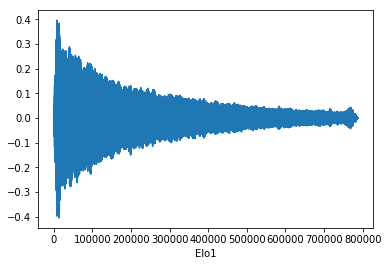

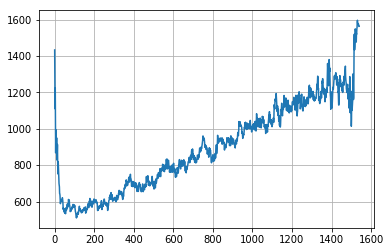

In [ ]:
idx=123
plt.plot(rawData[idx])
plt.xlabel(soundLabel[idx])
plt.show()
plt.plot(soundData[idx][0])
plt.grid()
plt.show()

In [ ]:
X=[]
for s in soundData:
    for val in s:
        X.append(val)

In [ ]:
print(max([len(x) for x in X]))
maxlen=max([len(x) for x in X])
X=pad_sequences(X,maxlen=maxlen)
np.shape(X)

154


(558, 154)

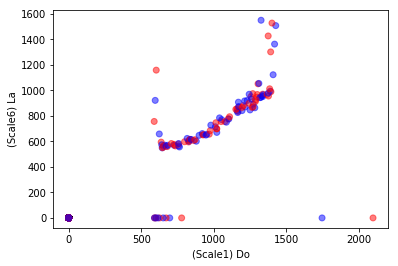

In [ ]:
idx1,idx2=np.random.randint(len(X)),np.random.randint(len(X))
plt.scatter(X[idx1],X[idx2],c=['r','b'],alpha=0.5)
plt.xlabel(soundLabel[idx1])
plt.ylabel(soundLabel[idx2])
plt.show()

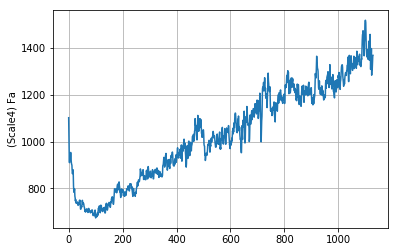

In [ ]:
idx=np.random.randint(len(X))
plt.plot(soundData[idx][0])
plt.ylabel(soundLabel[idx])
plt.grid()
plt.show()

In [ ]:
np.shape(X)

(124, 1540)

In [ ]:
num_classes=len(set(soundLabel))
num_classes

62

In [ ]:
targetLabelEncoder=LabelEncoder()
y=targetLabelEncoder.fit_transform(soundLabel)
#X=X.reshape(X.shape[0],X.shape[1],1)
#y=to_categorical(y=target,num_classes=num_classes)
#input_shape=(X.shape[1],1)

In [ ]:
np.shape(X),np.shape(y)

((558, 154), (558,))

In [ ]:
y[0]

53

In [ ]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression,SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, Dropout, BatchNormalization, GRU
from tensorflow.keras import Model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,test_size=0.20,random_state=43)

LC= LogisticRegression()
LC.fit(X_train,y_train)
print('Accuracy:', LC.score(X_test,y_test))

Accuracy: 0.8392857142857143


In [ ]:

pl_log_reg = Pipeline(steps=[('scaler',StandardScaler()),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100))])
scoring = {'acc': 'accuracy',
           'rec': 'recall_macro',
           'prec': 'precision_macro'}
scores = cross_validate(pl_log_reg, X, y,scoring=scoring, cv=4)
avg_scores = {}
for mets, vals in scores.items():
   
    avg_scores[mets] = sum(vals)/ float(len(vals))
    
print(f"Accuracy: {avg_scores['test_acc']}")
print(f"Recall: {avg_scores['test_rec']}")
print(f"Precision: {avg_scores['test_prec']}")

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef

Accuracy: 0.8051075268817205
Recall: 0.8051075268817205
Precision: 0.7777649769585253


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
pl_svm = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pl_svm', LinearSVC())])
scoring = {'acc': 'accuracy',
           'rec': 'recall_macro',
           'prec': 'precision_macro'}
scores = cross_validate(pl_svm, X, y, cv=4,scoring=scoring)
avg_scores = {}
for mets, vals in scores.items():
   
    avg_scores[mets] = sum(vals)/ float(len(vals))
    
print(f"Accuracy: {avg_scores['test_acc']}")
print(f"Recall: {avg_scores['test_rec']}")
print(f"Precision: {avg_scores['test_prec']}")

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input d

Accuracy: 0.8810483870967742
Recall: 0.8810483870967742
Precision: 0.8605510752688171


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
pl_mlp = Pipeline(steps=[('scaler',StandardScaler()),
                             ('mlp_ann', MLPClassifier(hidden_layer_sizes=(1275, 637)))])
scoring = {'acc': 'accuracy',
           'rec': 'recall_macro',
           'prec': 'precision_macro'}
scores = cross_validate(pl_mlp, X, y, cv=4,scoring=scoring)
avg_scores = {}
for mets, vals in scores.items():
  
    avg_scores[mets] = sum(vals)/ float(len(vals))
    
print(f"Accuracy: {avg_scores['test_acc']}")
print(f"Recall: {avg_scores['test_rec']}")
print(f"Precision: {avg_scores['test_prec']}")

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input d

Accuracy: 0.8313172043010753
Recall: 0.8313172043010753
Precision: 0.7855510752688171


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:

pl_random_forest = Pipeline(steps=[('random_forest', RandomForestClassifier())])
scoring = {'acc': 'accuracy',
           'rec': 'recall_macro',
           'prec': 'precision_macro'}
scores = cross_validate(pl_random_forest, X, y, cv=4,scoring=scoring)
avg_scores = {}
for mets, vals in scores.items():
   
    avg_scores[mets] = sum(vals)/ float(len(vals))
    
print(f"Accuracy: {avg_scores['test_acc']}")
print(f"Recall: {avg_scores['test_rec']}")
print(f"Precision: {avg_scores['test_prec']}")

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.8192204301075269
Recall: 0.8192204301075269
Precision: 0.8233678955453149


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
idx=np.random.randint(len(X_test))
print('Pred:',targetLabelEncoder.inverse_transform(LC.predict([X_test[idx]]))[0])
print('Actual:',targetLabelEncoder.inverse_transform(y_test[idx]))

Pred: G2
Actual: G2


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
